In [1]:
import pandas as pd
perch_full = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [3]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [5]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

In [ ]:
# 다항식 형태로 확장
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# 비선형 특징 포함한 확장 벡터
poly = PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


In [ ]:
# 상수항 제거
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


In [12]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [13]:
poly.get_feature_names_out()

array(['length', ' height', ' width', 'length^2', 'length  height',
       'length  width', ' height^2', ' height  width', ' width^2'],
      dtype=object)

In [14]:
test_poly = poly.transform(test_input)

In [ ]:
# 다중 회귀 train set
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982125


In [ ]:
# 다중 회귀 test set
print(lr.score(test_poly, test_target))

0.9714559911594208


⤷ 길이 사용 시 과소적합 문제 해결

In [ ]:
# 5제곱 다중 회귀
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [ ]:
# 5제곱 train set
lr.fit(train_poly, train_target)
print(lr.score(train_poly,train_target))

0.999999999999783


In [ ]:
# 5제곱 test set
print(lr.score(test_poly,test_target))

-144.40494187144606


⤷train set 과대적합으로 test set 저하

In [21]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [ ]:
# 릿지회귀 train set
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [ ]:
# 릿지회귀 test set
print(ridge.score(test_scaled,test_target))

0.9790693977615373


In [25]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

In [ ]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)함 # L2규제로 반복 필요 없음
    ridge.fit(train_scaled, train_target)
    
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))


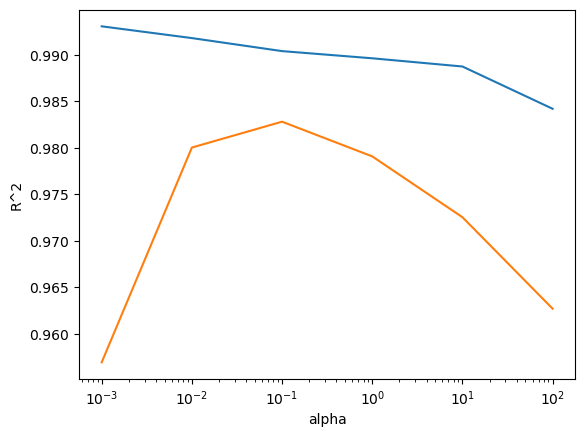

In [ ]:
# 릿지회귀 BLUE:TRAIN / ORANGE:TEST
plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [ ]:
# 릿지회귀 alpha=0.1 최적값
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386897


In [ ]:
# 라쏘회귀 train set
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))

0.989789897208096


In [ ]:
# 라쏘회귀 test set
print(lasso.score(test_scaled, test_target))

0.9800593698421884


In [ ]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, max_iter=10000) #L1규제로 반복해서 알아가야해서 iteration 필요 /
    lasso.fit(train_scaled, train_target)

    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/Users/kangdayeon/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/Users/kangdayeon/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


⤷if ConvergenceWarning 이 뜨면, 반복 횟수 부족

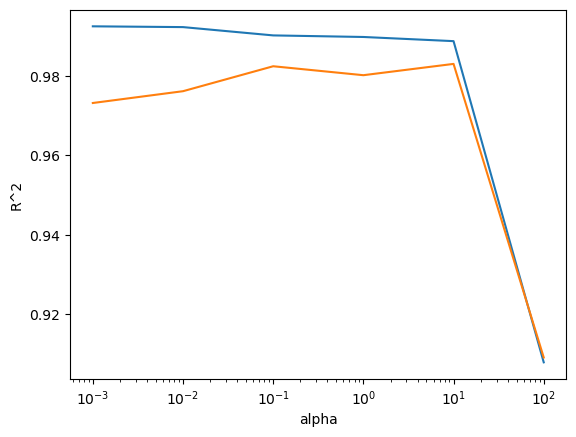

In [ ]:
# 라쏘회귀 BLUE:TRAIN / ORANGE:TEST
plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

⤷ alpha=10 최적값

In [ ]:
# 라쏘회귀 alpha=10 최적값
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131866
0.9824470598706695


In [35]:
print(np.sum(lasso.coef_ == 0))

40
